# Разметка на основе правил

In [3]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nata44845\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Определение набора положительных и отрицательных слов
positive_words = ['happy', 'excited', 'awesome']
negative_words = ['disappointed', 'frustrated', 'terrible']

In [5]:
# Функция для присвоения метки настроения на основе наличия положительных или отрицательных слов
def get_sentiment(text):
    # Токенизация текста на отдельные слова
    words = nltk.word_tokenize(text.lower())
    # Подсчет количества положительных и отрицательных слов
    num_positive = sum([1 for word in words if word in positive_words])
    num_negative = sum([1 for word in words if word in negative_words])
    # Присвоение метки на основе чистой оценки настроения
    if num_positive > num_negative:
        return 'positive'
    elif num_negative > num_positive:
        return 'negative'
    else:
        return 'neutral'

In [4]:
# Тестирование функции
text1 = "I'm so happy today!"
text2 = "I'm so frustrated with this service."
text3 = "This movie was okay, I guess."
print(get_sentiment(text1))
print(get_sentiment(text2))
print(get_sentiment(text3))

positive
negative
neutral


In [6]:
# Загрузка датасета твитов
tweets = pd.read_csv('tweets.csv')

In [7]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [12]:
from textblob import TextBlob

In [14]:
# Определение функции для получения полярности настроения твита
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity

In [15]:
# Применение функции к столбцу 'text' датасета для получения полярности настроения каждого твита
tweets['sentiment'] = tweets['text'].apply(get_sentiment)

In [16]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.50
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.00
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.05
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00


In [18]:
# Определение функции для присвоения метки настроения на основе оценки полярности настроения
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [19]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.50
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.00
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.05
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00


In [20]:
# Применение функции к столбцу 'sentiment' датасета для присвоения меток настроения
tweets['sentiment_label'] = tweets['sentiment'].apply(get_sentiment_label)

In [21]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment,sentiment_label
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,neutral
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.50,negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.00,neutral
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.05,negative
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00,neutral


In [22]:
# Определение функции для присвоения метки на основе числового порога
def get_category(value):
    if value > 100000:
        return 'high'
    elif value < 5000:
        return 'low'
    else:
        return 'medium'

In [23]:
# Применение функции к столбцу данных
tweets['follow_category'] = tweets['user_followers'].apply(get_category)

In [24]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment,sentiment_label,follow_category
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,neutral,low
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.50,negative,low
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.00,neutral,low
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.05,negative,medium
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00,neutral,low


<Axes: >

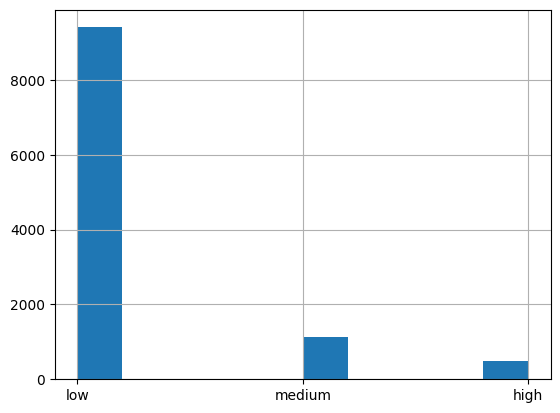

In [26]:
tweets['follow_category'].hist()

<Axes: >

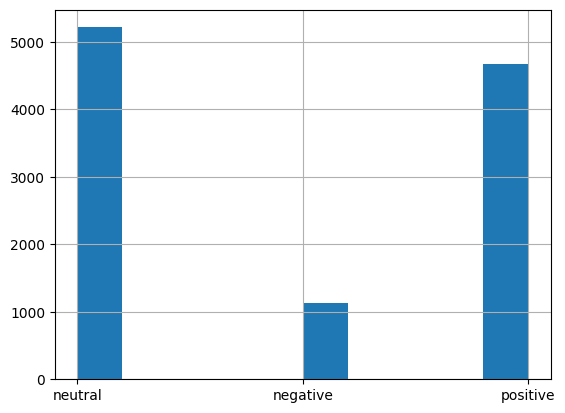

In [27]:
tweets['sentiment_label'].hist()

# Разметка данных с использованием активного обучения

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [42]:
# Загрузка датасета рецензий на фильмы
reviews = pd.read_csv('train.csv', engine='python', sep = ',')
reviews.rename(columns = {'Review': 'text','Label':'sentiment'}, inplace = True)

In [43]:
reviews.head()

,text,sentiment
0,for a movie that gets no respect there sure ar...,pos
1,bizarre horror movie filled with famous faces ...,pos
2,a solid if unremarkable film matthau as einste...,pos
3,it s a strange feeling to sit alone in a theat...,pos
4,you probably all already know this by now but ...,pos


In [44]:
# Замена 'neg' на 0 и 'pos' на 1
reviews['sentiment'] = reviews['sentiment'].replace({'neg': 0, 'pos': 1})

C:\Users\Nata44845\AppData\Local\Temp\ipykernel_3492\3600659259.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reviews['sentiment'] = reviews['sentiment'].replace({'neg': 0, 'pos': 1})


<Axes: >

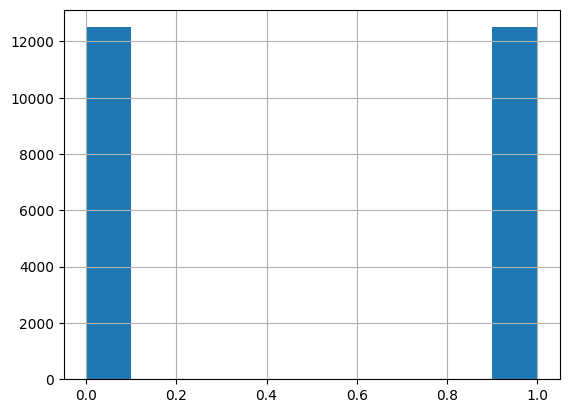

In [45]:
reviews['sentiment'].hist()

In [46]:
# Перемешивание данных
reviews = shuffle(reviews)

In [47]:
# Разделение датасета на размеченную и неразмеченную выборки
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.2, random_state=42)

In [48]:
labeled_reviews.head()

,text,sentiment
5213,madhur bhandarkar goes all out to touch upon t...,1
7979,i can t understand what it is that fans of the...,1
22127,this incredibly overrated anime television ser...,0
6387,the young victoria is a elegantly costumed and...,1
12170,the sopranos now preparing to end is the very ...,1


In [49]:
unlabeled_reviews.head()

,text,sentiment
17236,i don t understand why people would praise thi...,0
8138,this is the most recent addition to a new wave...,1
24650,if in the first minutes of this film you don t...,0
4583,dressed to kill is surely one of the best horr...,1
14503,this is a complete hoax the movie clearly has ...,0


In [50]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_reviews):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_reviews['text'])
    y = labeled_reviews['sentiment']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [51]:
# Обучение начальной модели на небольшом наборе 
model, vectorizer = train_model(labeled_reviews)

In [52]:
model

LogisticRegression()

In [53]:
vectorizer

TfidfVectorizer()

In [54]:
# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_reviews['text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [56]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [57]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]

In [58]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])

In [59]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_reviews)

In [65]:
reviews_test = pd.read_csv('test.csv', engine='python', sep=",")
reviews_test.rename(columns = {'Review': 'text','Label':'sentiment'}, inplace = True)

In [67]:
reviews_test.head()

,text,sentiment
0,for a movie that gets no respect there sure ar...,pos
1,bizarre horror movie filled with famous faces ...,pos
2,a solid if unremarkable film matthau as einste...,pos
3,it s a strange feeling to sit alone in a theat...,pos
4,you probably all already know this by now but ...,pos


In [68]:
# Замена 'neg' на 0 и 'pos' на 1 в тестовом датасете
reviews_test['sentiment'] = reviews_test['sentiment'].replace({'neg': 0, 'pos': 1})

C:\Users\Nata44845\AppData\Local\Temp\ipykernel_3492\1819752290.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reviews_test['sentiment'] = reviews_test['sentiment'].replace({'neg': 0, 'pos': 1})


In [70]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(reviews_test['text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(reviews_test['sentiment'], y_test_predicted)

print(f1)

0.8779294563244694
